1. [Route 53](#route-53)
2. [What does DNS record consist of](#what-does-dns-record-consist-of)
3. [Types of Record](#types-of-record)
4. [Hosted Zones](#hosted-zones)
5. [Registering a Domain](#registering-a-domain)
6. [To check Domain created](#to-check-domain-created)
7. [Create Records in Route 53](#create-records-in-route-53)
8. [Using Cloud Shell to check how created records work](#using-cloud-shell-to-check-how-created-records-work)
9. [Route 53 EC2 Setup](#route-53-ec2-setup)
10. [Route 53 TTL (Time to Live)](#route-53-ttl-time-to-live)
11. [CNAME vs Alias](#cname-vs-alias)
12. [Alias Record Targets](#alias-record-targets)
13. [Route 53 Routing Policies](#route-53-routing-policies)
14. [Simple Routing Policy](#simple-routing-policy)
15. [Weighted Routing Policy](#weighted-routing-policy)
16. [Latency Routing Policy](#latency-routing-policy)
17. [Health Checks](#health-checks)
15. [Health Checks monitor endpoint](#health-checks-monitor-endpoint)
16. [Calculated Health Checks](#calculated-health-checks)
17. [Health Checks in private Hosted Zones](#health-checks-in-private-hosted-zones)
18. [Create Health Checks for endpoint](#create-health-checks-for-endpoint)
19. [Failover Routing Policy (Active-Passive)](#failover-routing-policy-active-passive)
20. [Geo-location Routing Policy](#geo-location-routing-policy)
21. [Geo-proximity Routing Policy](#geo-proximity-routing-policy)
22. [Route Traffic Flow](#route-traffic-flow)
23. [IP based Routing](#ip-based-routing)
24. [Multi Value Routing Policy](#multi-value-routing-policy)
25. [Domain Registrar vs DNS Service](#domain-registrar-vs-dns-service)
26. [Setup GoDaddy with Route53](#setup-godaddy-with-route53)

#### Route 53:
- Highly available, scalable, AWS managed authoritative DNS service
    - Authoritative
        - customers (you) can update the DNS record, full control and its up to date 
- Its a Domain Registrar
- Ability to check health
- Route 53 can be used as a load balancer
- Only AWS service with 100% availability SLA
- 53 is the reference to traditional DNS port

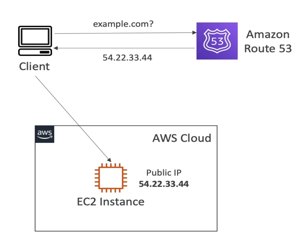

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Route53.jpeg')
new_image = img.resize((300, 250))
display(new_image)

In the above example, we define the DNS records inside Amazon Route 53 to route the traffic to the domain

#### What does DNS record consist of:
- Domain / Sub Domain name
- Type of record (A, AAAA, MX, CNAME, NS, etc.)
- IP address (value)
- Routing Policy
- TTL (cache)

#### Types of Record:
- A (maps a hostname to IPv4)
- AAAA (maps a hostname to IPv4)
- CNAME (maps a hostname into another hostname)
    - The target is a domain name which must have A or AAAA record
    - Cant create CNAME record for top node of DNS Namespace (Zone Apex)
        - create CNAME for example.com not possible but possible for wwww.example.com
- Name Server (Hosted Zones)
    - controls traffic for domain

#### Hosted Zones:
- A container for records
    - controls how traffic is routed to a domain and sub domain
- 2 types
    - public
        - contains records on how to route traffic on the internet
    - private
        - contains records on how to route traffic between VPCs
- For any hosted zone, we pay 0.50 dollars per month


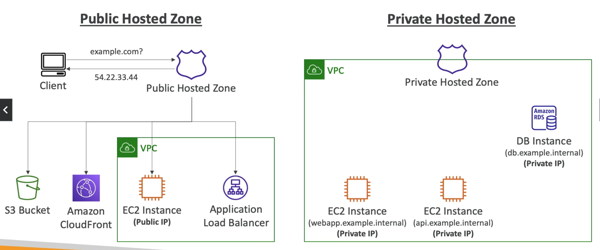

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Hostedzone.jpeg')
new_image = img.resize((600, 250))
display(new_image)

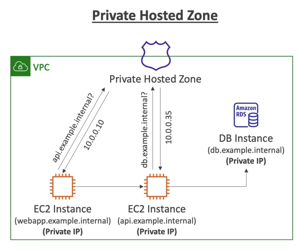

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/privatehostedzone.jpeg')
new_image = img.resize((300, 250))
display(new_image)

#### Registering a Domain:
- Go to Route 53 Service from AWS console
- Inside Route 53 Service, Go to Domains
    - Registered Domains
        - Register Domains
            - Search for Domain (type domain name wanted)
            - Proceed to checkout
                - Auto Renew
                - Contact details
                - privacy protection to avoid spams on our contact details
            - Review

#### To check Domain created:
- Go to Hosted Zones in Route 53 console
- Select and click the Domain name registered
    - There are 4 types of record types created
        - SOA
        - NS
        - CNAME 
        - A => IP


#### Create Records in Route 53:
- Go to Hosted zones in Route 53 console
- Select and click the created domain name
- Under records tab, 
    - create record
        - name eg: test.johntheteacher.com
        - type
            - A
            - AAAA
            - CNAME
            - SOA
            - MX, etc
        - Routing Policy
        - Value (IP address) eg: 11.22.33.44 
        - TTL

#### Using Cloud Shell to check how created records work:
- Go to Cloudshell
- Install dig and nslookup library
    - sudo yum install -y bind-utils
- In the command line (cloudshell), type "nslookup test.johntheteacher.com" or "dig test.johntheteacher.com"
    - give the information about the record

#### Route 53 EC2 Setup:
- Setup 3 EC2 instances first from EC2 console
- Create E2 instances from 3 different regions
- Create a Load Balancer for EC2 for one of the three regions and create a target group
- Verify the User data script added during EC2 instance creation for 3 regions by loading the public IP on a web browser

#### Route 53 TTL (Time to Live):
- High TTL (24 hours):
    - Less traffic on Route 53
    - Outdated records, if DNS record is changed and customers have to wait till 24 hours

- Low TTL (60 seconds):
    - High traffic on Route 53
    - Easy to change records

- For Alias record TTL is not required, whereas for DNS its mandatory

Add the EC2 instance IP to the created record "test.johntheteacher.com" and also add TTL to the record to validate the TTL and record routing the IP of the EC2 instance.

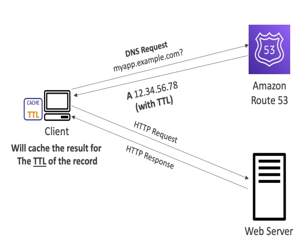

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/TTL.jpeg')
new_image = img.resize((300, 250))
display(new_image)

#### CNAME vs Alias:

- AWS Resources (Load Balancer, CloudFront, etc) exposes an AWS hostname
    - lb1-1234.us-east-2.elb.amazonaws.com
- But we need a domain instead of the above AWS exposed name for the ELB example

- CNAME:
    - a hostname points to another hostname
        - eg: app.example.com -> blog.askmeanything.com
    - only not for root domain (eg: example.com)

- Alias:
    - a hostname points to AWS resource
        - eg: blog.example.com -> blog.example.com.s3-website-us-east-1.amazonaws (valid)
    - works for both root and non root domains
    - Free of charge
    - Health checks
    - Record types are A (IPv4) / AAAA (IPv6) for AWS resources
    - No TTL


#### Alias Record Targets:
- ELB
- CloudFront
- API Gateway
- S3 Websites
- VPC interface endpoints
- Elastic BeanStalk
- Global Accelerator
- Route 53 record

Cannot set Alias record for EC2 DNS name

#### Route 53 Routing Policies:

Supports:
- Simple
- Weighted
- Latency
- Failover
- Geolocation
- Multi-Value
- Geoproximity
- IP based

#### Simple Routing Policy:
- Typically, route traffic to a single resource
- Can also specify multiple values for same record
    - if multiple values are returned and client will chose any one 
- When Alias enabled, can specify only one resource
- Cant be associated with Health checks

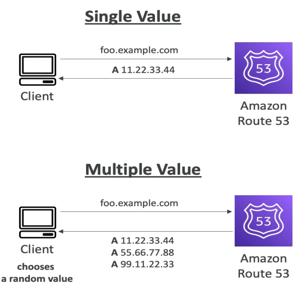

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Simple.jpeg')
new_image = img.resize((300, 300))
display(new_image)

#### Weighted Routing Policy:
- Control the % of requests that go to each resource
- % traffic = weight for a specific record / sum of total weight of all records
- associated with health checks
- DNS must have same name and type
- load balancing between regions, testing new version of applications, etc
- Assign a value of 0 to a record will stop sending traffic to the resource
- If all records have 0 then all records will have equal weights and returned equally

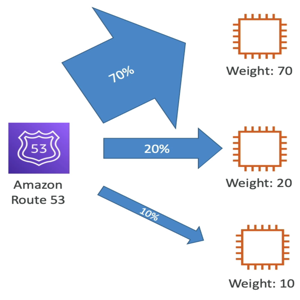

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Weighted.jpeg')
new_image = img.resize((300, 300))
display(new_image)

#### Latency Routing Policy:
- Redirect to resource which has least latency
- helpful when latency to user is priority
- latency is based on traffic between users and AWS regions
- Associated with health checks


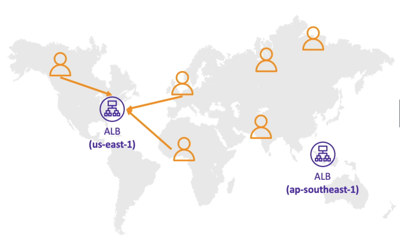

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Latency.jpeg')
new_image = img.resize((400, 250))
display(new_image)

#### Health Checks:
- HTTP Health checks are only for public AWS resources
- Health check => Automated DNS failover
    - Health check that monitor endpoint
    - Health check that monitors other health checks (calculated health checks)
    - Health check that monitors via Cloud watch alarm using a metric (full control)
- Health checks are integrated with Cloudwatch metrics

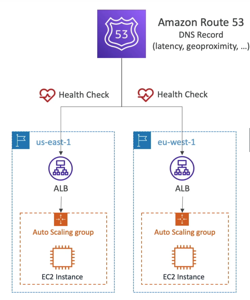

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/healthchecks.jpeg')
new_image = img.resize((250, 300))
display(new_image)

#### Health Checks monitor endpoint:
- 15 global health checkers will check the endpoint health
    - Healthy/UnHealthy Threshold => 3 (default)
    - Interval 30 secs (can set to 10 sec but higher cost)
    - Supported protocol: HTTP, HTTPS, TCP
    - If >18% of health checkers report endpoint healthy, Route 53 considers it healthy
    - Ability to choose which location we want to use Route 53
- Health Checks pass only when endpoints respond with 2XX or 3XX status codes
- Health Checks can be fail/pass based on text in the first 5120 bytes of response

Note:
- Must allow incoming requests from Route 53 Health Checkers IP address range (ALB or any AWS resource)
    - https://ip-ranges.amazonaws.com/ip-ranges.json

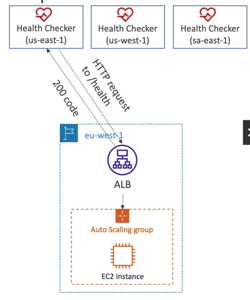

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/healthchecks1.jpeg')
new_image = img.resize((250, 300))
display(new_image)

#### Calculated Health Checks:
- Combine multiple health checks into one
- Use AND, OR, NOT
- Can monitor up to 256 health checks
- Specify how many health checks to make parent health check to pass

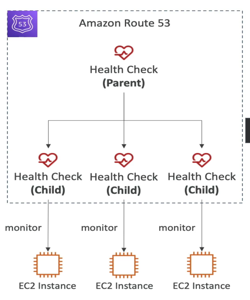

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/healthchecks2.jpeg')
new_image = img.resize((250, 300))
display(new_image)

#### Health Checks in private Hosted Zones:
- Route 53 checkers are outside of VPC
- Cant access private endpoints
- For these constraints, we can create a cloudwatch alarm using cloudwatch metric and then create an health check which monitors the alarm itself

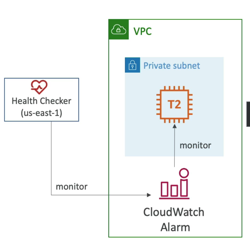

In [20]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/healthcheck3.jpeg')
new_image = img.resize((250, 250))
display(new_image)

#### Create Health Checks for endpoint:
- In Route 53 console
- Go to Health Check on the left side pane below Hosted Zones
- Create Health Checks
    - name
    - type
        - endpoint
        - calculated health checks
        - cloudwatch alarms
    - monitor endpoint
        - IP
            - protocol
            - IP address
            - hostname
            - port
            - path
        - Domain name
    - advanced configuration
        - request interval
            - standard (30 secs)
            - fast (10 secs)
        - failure threshold
            -  3 default
        - string matching
            - check for string matching in first 5120 bytes of response
        - invert health check status
        - latency graph
        - health checker regions
- Done

#### Failover Routing Policy (Active-Passive):

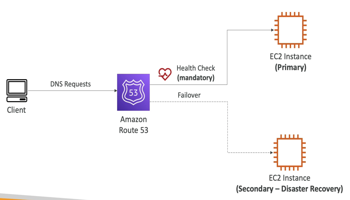

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/failover.jpeg')
new_image = img.resize((350, 200))
display(new_image)

#### Geo-location Routing Policy:
- Based on user location
- specify location by continent, country or state
- should create a default record (in case of no match on location)
- associated with health checks
- uses: website localization, load balancing, etc

#### Geo-proximity Routing Policy:
- route traffic to AWS resources based on user location and AWS resources location
- shift more traffic to resources based on bias
    - more traffic to a specific resource => expand (1 to 99)
    - less traffic to a specific resource => shrink (-1 to -99)
- could be AWS region or lat & Long
- should use Route 53 Traffic flow to use this feature

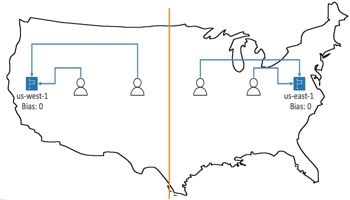

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/geo.jpeg')
new_image = img.resize((350, 200))
display(new_image)

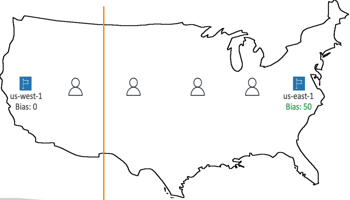

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/geo1.jpeg')
new_image = img.resize((350, 200))
display(new_image)

#### Route Traffic Flow:
- simplify the process of creating and maintaining complex routing configuration
- visual editor to manage complex routing decision trees
- can be saved as traffic flow policy
    - supports versioning
    - can be applied to different Route 53 hosted zones

#### IP based Routing:
- based on clients IP address
- provide a list of CIDRs for clients and map endpoints to it

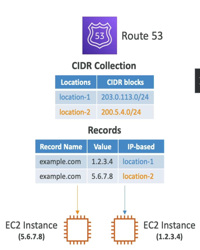

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ip.jpeg')
new_image = img.resize((200, 250))
display(new_image)

#### Multi Value Routing Policy:
- when routing traffic to multiple resources
- route 53 can return multiple values/resources
- associated health checks
- multi-value is not substitute of ELB
- upto 8 healthy records are return for each multi-value query

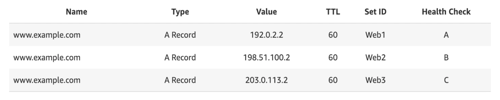

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/mv.jpeg')
new_image = img.resize((500, 100))
display(new_image)

#### Domain Registrar vs DNS Service:
- Domain Registrar:
    - Pay charges to buy or register a domain (Go Daddy, Route53 (Amazon Registrar Inc, etc))
    - provides DNS service to manage DNS records

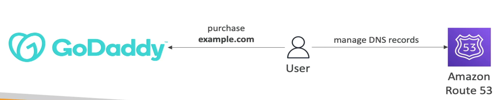

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dnsR53.jpeg')
new_image = img.resize((500, 100))
display(new_image)

#### Setup GoDaddy with Route53:
- Once we register a domain with GoDaddy
    - We get the 4 NameServers
- We need to create a hosted zone in Route53
    - We get the 4 NameServers
- Change the NameServer information to match Route53 NameServer details

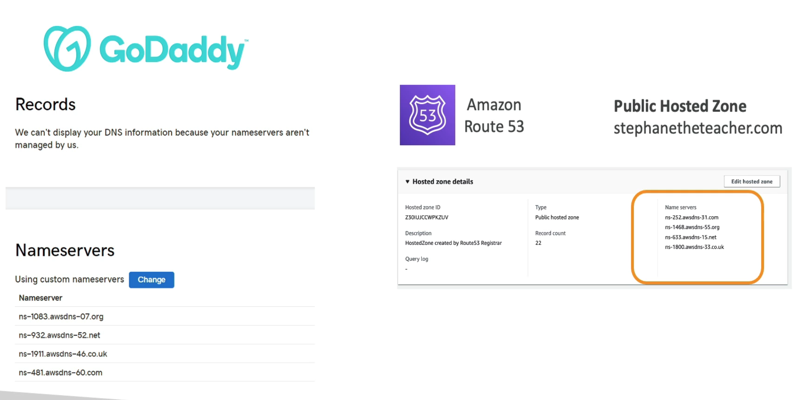

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dnsR531.jpeg')
new_image = img.resize((800, 400))
display(new_image)